In [206]:
import cv2
import numpy as np
import os
import pathlib
%matplotlib inline
import matplotlib.pyplot as plt


HOME = os.environ.get("HOME_PATH")
FRAME_PATH = os.path.join(HOME,  "frames")
SAMPLE_FOLDER = os.path.join(FRAME_PATH, '20180326_071412_NF.mp4')


In [207]:
HOME = os.environ.get("HOME_PATH")
FRAME_PATH = os.path.join(HOME,  "pipeline")
SAMPLE_FOLDER = os.path.join(FRAME_PATH, '2. frames')
SAMPLE_IMAGE =  os.path.join(SAMPLE_FOLDER, '20190401_182930_EF.mp4.frame-001.png')
SIMILAR_IMAGE =  os.path.join(SAMPLE_FOLDER, '20190401_182930_EF.mp4.frame-002.png')



   
original = cv2.imread(SAMPLE_IMAGE)
similar = cv2.imread(SIMILAR_IMAGE)



In [208]:
def get_sub_image(image):
    left = 480
    width = 1320
    top = 400
    height = 900

    return image[top:height,left:width,:] 

In [209]:
def mse(image_a, image_b):
    sub_a = get_sub_image(image_a)
    sub_b = get_sub_image(image_b)
    err = np.sum((sub_a.astype("float") - sub_b.astype("float")) ** 2)
    image_pixel_count = np.prod(sub_a.shape)
    err /= float(image_pixel_count)
    return err

5.42755


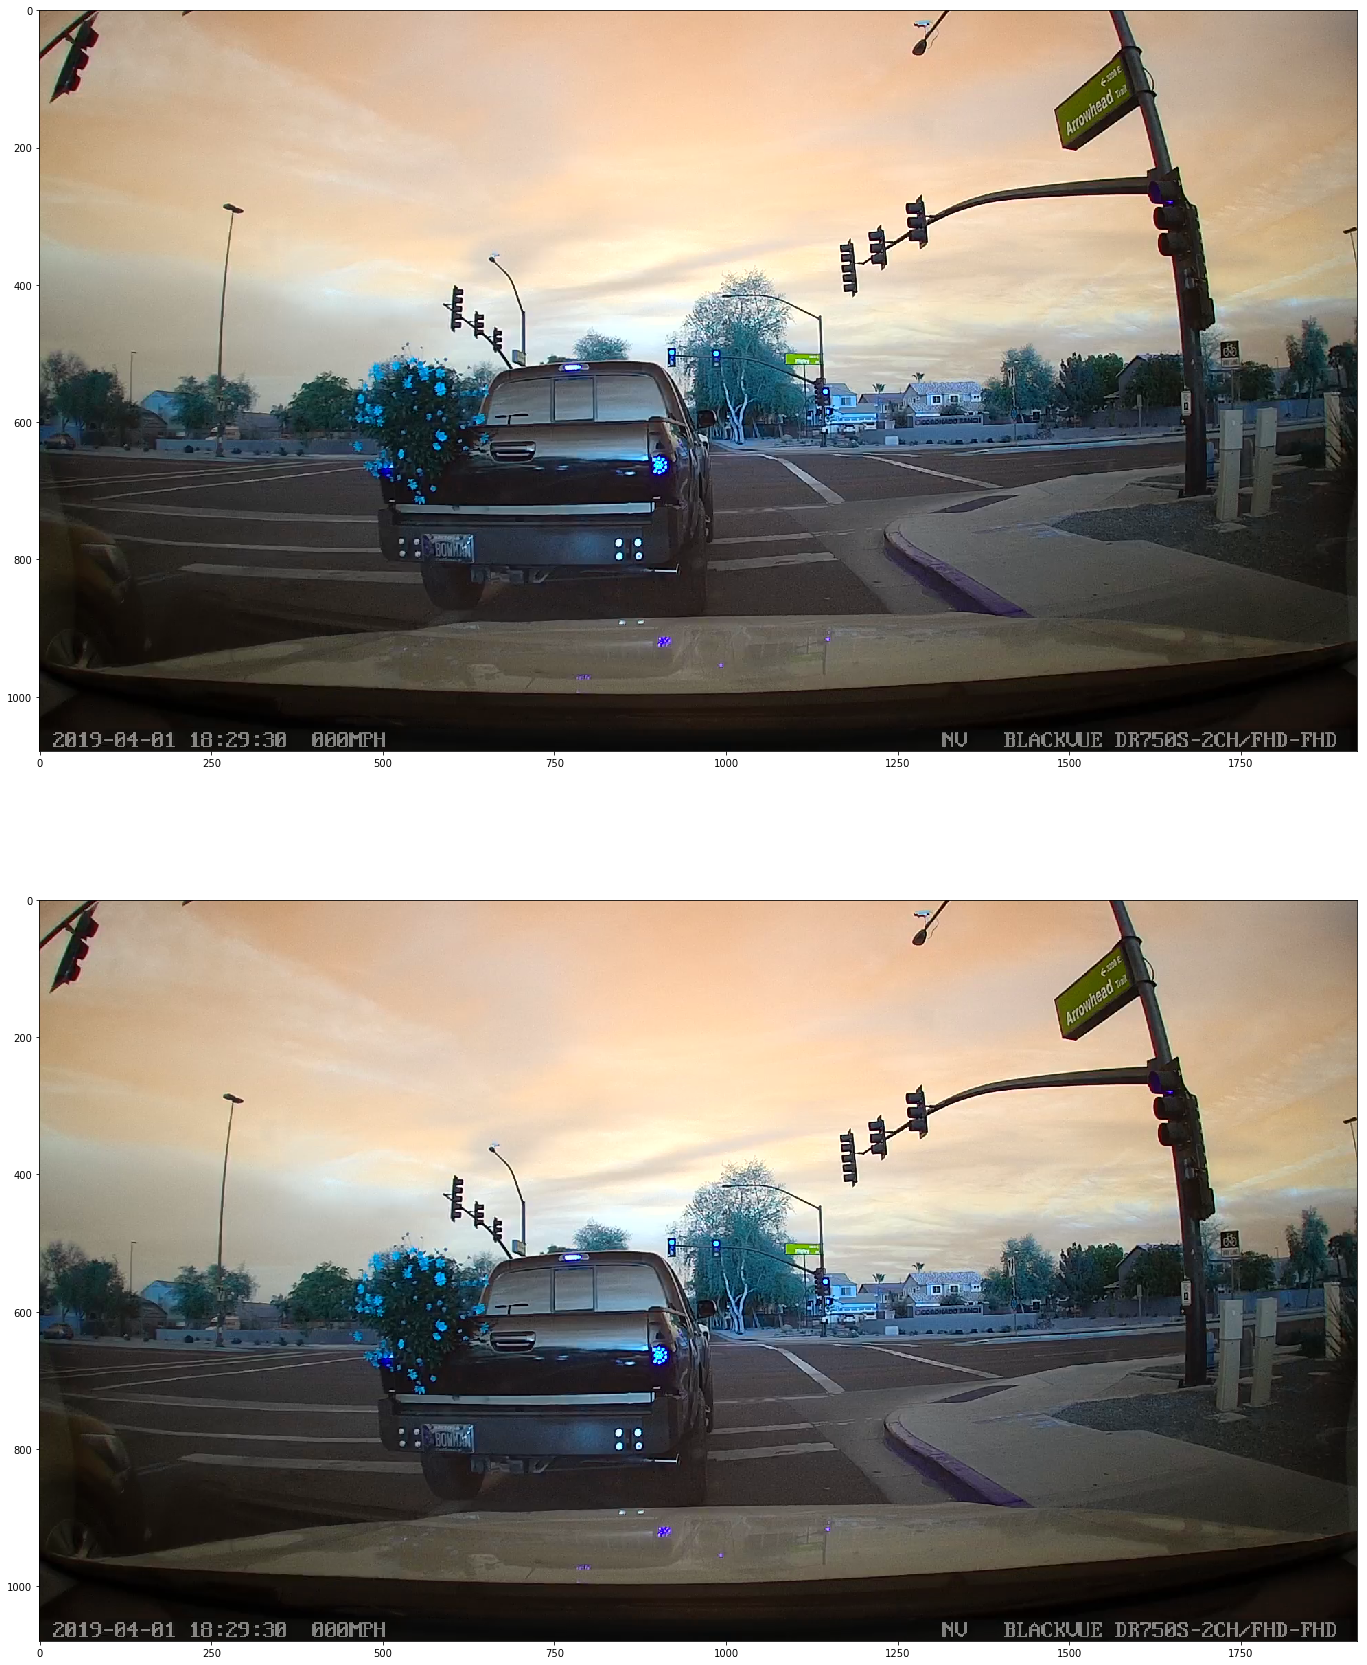

In [210]:
# 001 003 49
# 001 010 1064
# 015, 016 = 835

print(mse(original, similar))

fig=plt.figure(figsize=(30, 30))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(original)
fig.add_subplot(rows, columns, 2)
plt.imshow(similar, cmap=plt.cm.gray)

total pixels:  6220800
Images have the same size and channels


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Difference 0.0012848829732510288
[0.0003985  0.00043451 0.00045187]


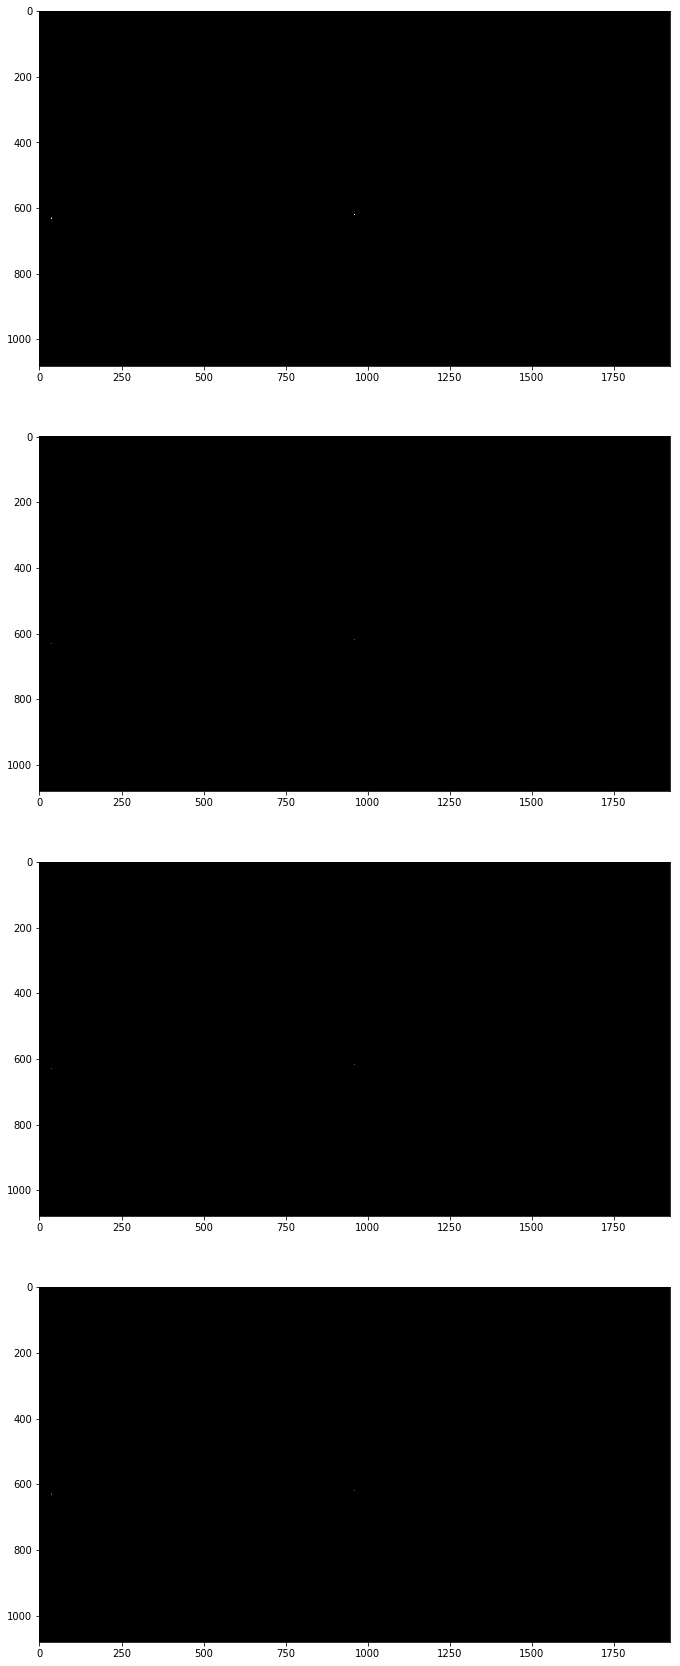

In [213]:


image_pixel_count = numpy.prod(original.shape)
image_chanel_pixel_count = image_pixel_count / 3

print("total pixels: ", image_pixel_count)


if original.shape == similar.shape :
    print("Images have the same size and channels")
    
    difference = original.astype("float") - similar.astype("float")
    difference[difference < 33] = 0
    b = difference[:,:,0] 
    g = difference[:,:,1] 
    r = difference[:,:,2] 
    
#     print("Originail", original[0][:20])
#     print("Simialr", similar[0][:20])
#     print("Diff", difference[0][:20])
#     print("Non zeros", difference[np.nonzero(difference)])
#     print("r", r[np.nonzero(r)])
#     print("g", g[np.nonzero(g)])
#     print("b", b[np.nonzero(b)])
    
    red_count = numpy.sum(r) 
    green_count = numpy.sum(g)
    blue_count = numpy.sum(b) 
    
    rgb = np.array([red_count, green_count, blue_count])
    
#     print("rgb non zeros", rgb)
#     print("difference non zeros", numpy.sum(rgb))
#     print("difference non zeros percent", numpy.sum(rgb) / image_pixel_count)
    
    # 24563282, 3.94 between 1 and 3
    # 74146348, 11.9191 between 1 and 60
    print("Difference", numpy.sum(difference) / image_pixel_count)
    
    
    
    print(rgb/image_pixel_count)
    
#     sift = cv2.xfeatures2d.SIFT_create()
    
    fig=plt.figure(figsize=(30, 30))
    columns = 1
    rows = 4
    fig.add_subplot(rows, columns, 1)
    plt.imshow(difference)
    fig.add_subplot(rows, columns, 2)
    plt.imshow(r, cmap=plt.cm.gray)
    fig.add_subplot(rows, columns, 3)
    plt.imshow(g,cmap=plt.cm.gray)
    fig.add_subplot(rows, columns, 4)
    plt.imshow(b,cmap=plt.cm.gray)
    
    
#     for i in range(1, columns*rows +1):
#         img = np.random.randint(10, size=(h,w))
#         fig.add_subplot(rows, columns, i)
#         plt.imshow(img)
#     plt.show()
    
#     plt.figure(num=None, figsize=(10 ,10), dpi=80, facecolor='w', edgecolor='k')
#     plt.imshow( r )
#     plt.imshow( g )
#     plt.imshow( b )
    
    


In [214]:
def get_similar_score(img_a, img_b):
    
    
    sub_a = get_sub_image(img_a)
    sub_b = get_sub_image(img_b)
    
    image_pixel_count = numpy.prod(sub_a.shape)
    image_chanel_pixel_count = image_pixel_count / 3
    
    if sub_a.shape == sub_b.shape :
        
        difference = sub_a.astype("float") - sub_b.astype("float")
        
        difference[difference < 33] = 0
        
        return numpy.sum(difference) / image_pixel_count
    
    else:
        raise TypeError("Images must be same size.") 
    

In [215]:
get_similar_score(original, similar)

0.004584920634920635

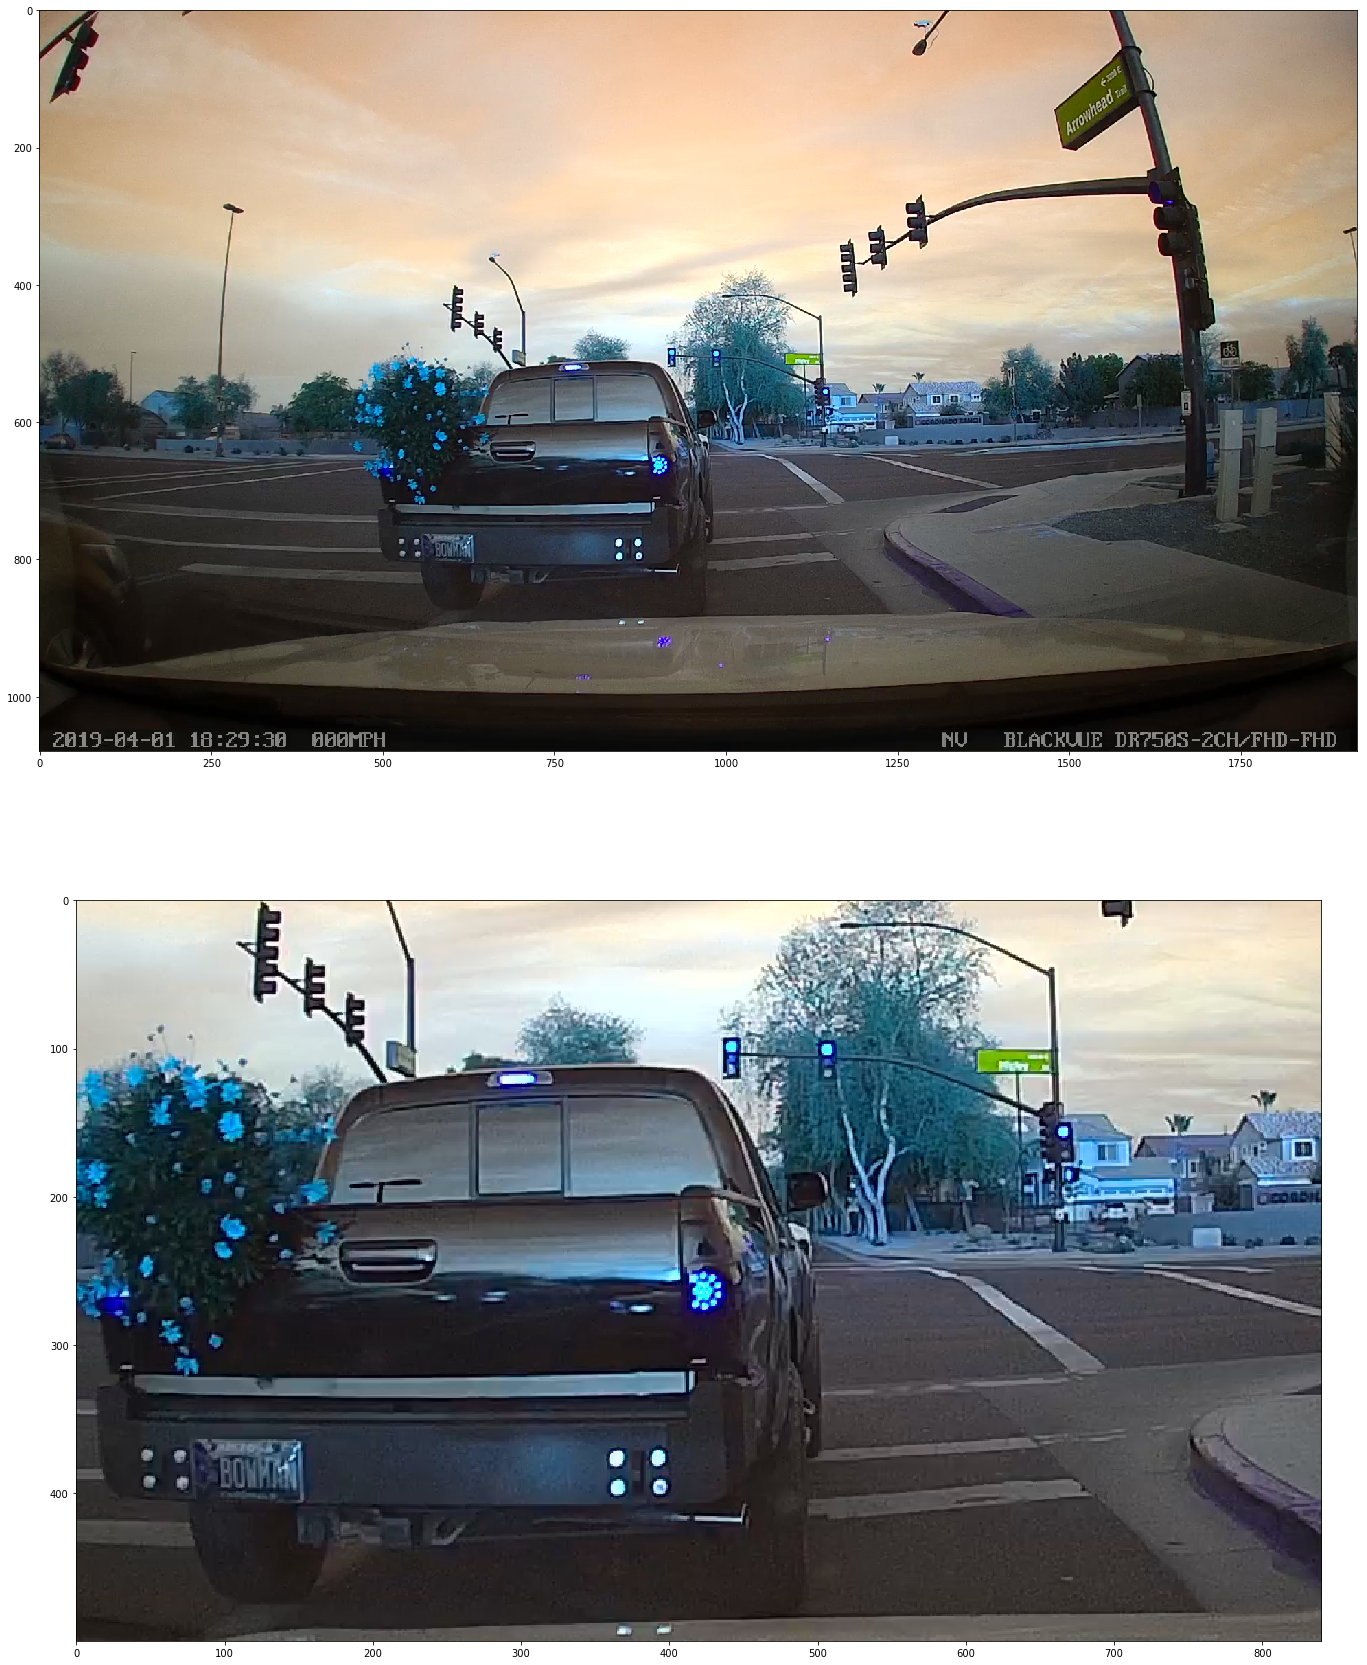

In [216]:
left = 480
width = 1320
top = 400
height = 900

b = original[top:height,left:width,:] 


fig=plt.figure(figsize=(30, 30))
columns = 1
rows = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(original)
fig.add_subplot(rows, columns, 2)
plt.imshow(b, cmap=plt.cm.gray)